In [115]:
import pandas as pd

path = 'C:\\Users\\marsovc\\Desktop\\Fmf\\Dodiplomsko\\Financna 3. letnik\\Programiranje 1\\Projektna-naloga-PROG1\\podatki\\'


#združimo csvje v 2 df-ja: prihod in odhod
stolpci = ['Ime', 'Državljanstvo', 'Pozicija', 'Klub', 'Cena', 'Leto']
prihod = pd.DataFrame(columns=stolpci)
odhod = pd.DataFrame(columns=stolpci)


for i in range (2000,2020):
    transferIN = pd.read_csv(str(path+str(i)+'IN.csv'))
    prihod=prihod.append(transferIN)
    
    transferOUT = pd.read_csv(str(path+str(i)+'OUT.csv'))
    odhod=odhod.append(transferOUT)
    
prihod = prihod.reset_index(drop=True)
odhod = odhod.reset_index(drop=True)

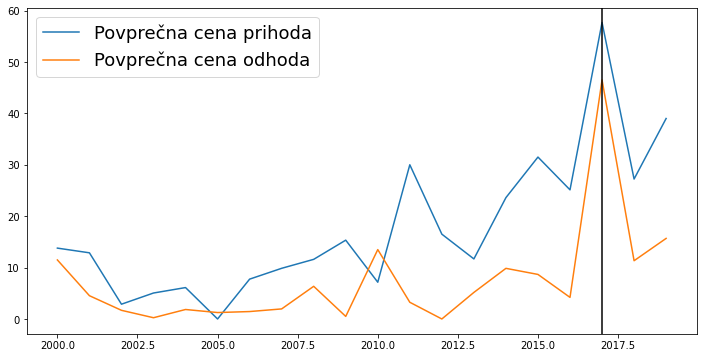

In [116]:
#poglejmo povprečno ceno prihodov in odhodov

avg_cena_prihod = prihod.groupby('Leto').mean()
avg_cena_odhod = odhod.groupby('Leto').mean()

import matplotlib.pyplot as pypt

pypt.figure(figsize=(12,6))
pypt.plot(range(2000,2020),avg_cena_prihod,label="Povprečna cena prihoda")
pypt.plot(range(2000,2020),avg_cena_odhod,label="Povprečna cena odhoda")
pypt.axvline(x=2017, ymin=0, ymax=1,color='Black')
pypt.legend(loc=2, prop={'size': 18})

pypt.show()

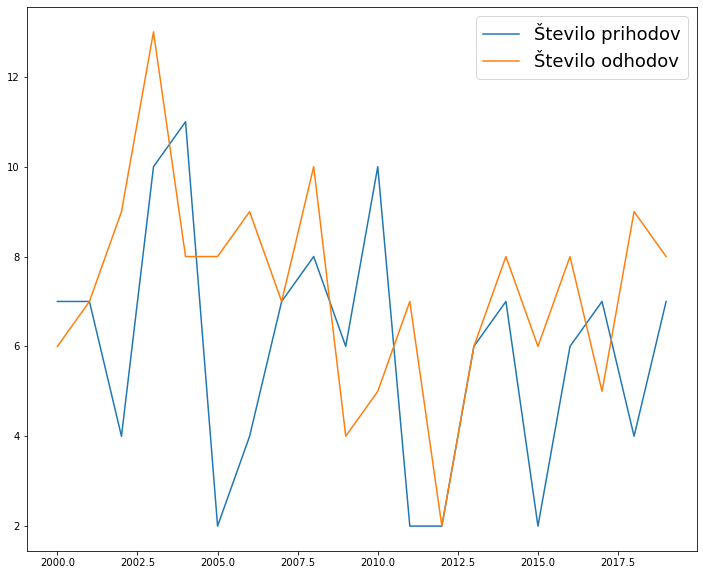

In [117]:
#Število prihodov in odhodov skozi leta
stevilo_prihodov = prihod.groupby('Leto').size()
stevilo_odhodov = odhod.groupby('Leto').size()

pypt.figure(figsize=(12,10))
pypt.plot(range(2000,2020),stevilo_prihodov,label="Število prihodov")
pypt.plot(range(2000,2020),stevilo_odhodov,label="Število odhodov")
pypt.legend(loc=1, prop={'size': 18})
pypt.show()

Text(0, 0.5, 'Število prestopov')

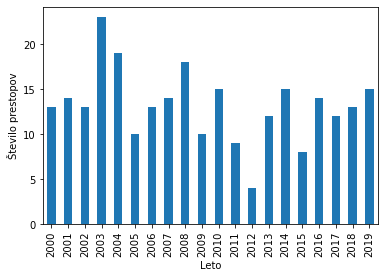

In [118]:
#število vseh prestopov v s histogramom
vsi = prihod.append(odhod)
vsi = vsi.reset_index(drop=True)
vsi = vsi.groupby('Leto').size()
graf = vsi.plot(kind='bar')
graf.set_ylabel('Število prestopov')

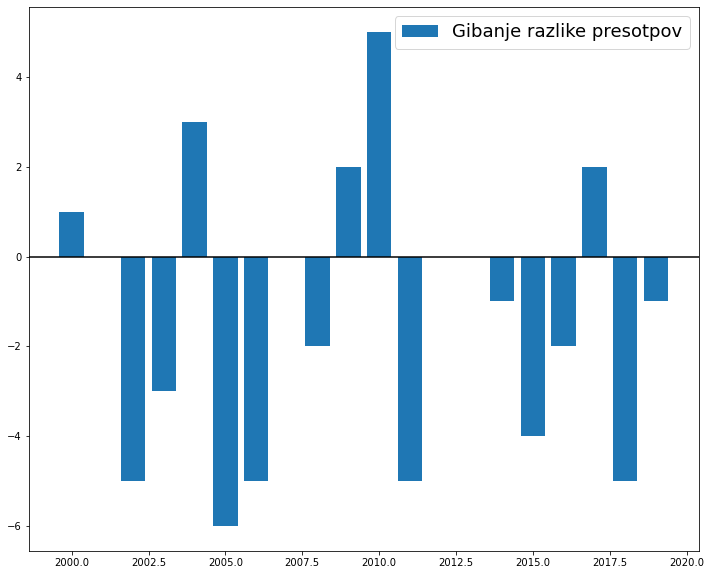

Leto
2000    1
2001    0
2002   -5
2003   -3
2004    3
2005   -6
2006   -5
2007    0
2008   -2
2009    2
2010    5
2011   -5
2012    0
2013    0
2014   -1
2015   -4
2016   -2
2017    2
2018   -5
2019   -1
dtype: int64

In [119]:
razlika = stevilo_prihodov - stevilo_odhodov

pypt.figure(figsize=(12,10))
razlika_graf = pypt.bar(range(2000,2020),razlika)
pypt.axhline(y=0,color='Black')

pypt.legend([razlika_graf], ['Gibanje razlike presotpov'],loc=1, prop={'size': 18})
pypt.show()

razlika

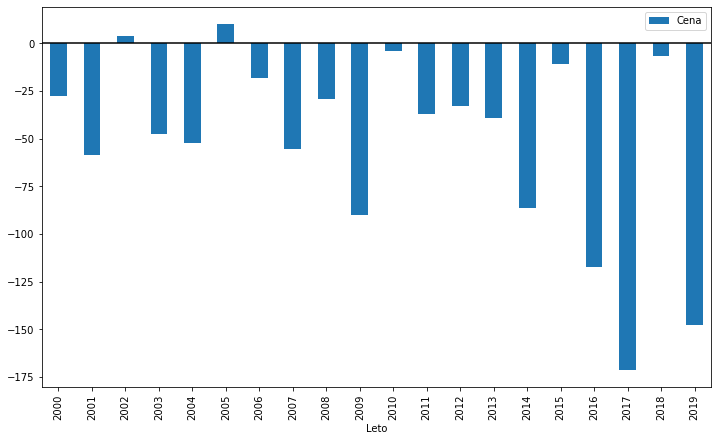

In [120]:
Cene = -prihod.groupby('Leto').sum() + odhod.groupby('Leto').sum()


Cene_graf = Cene.plot(kind='bar',figsize=(12,7))
pypt.axhline(y=0,color='Black')
pypt.legend()
pypt.show()

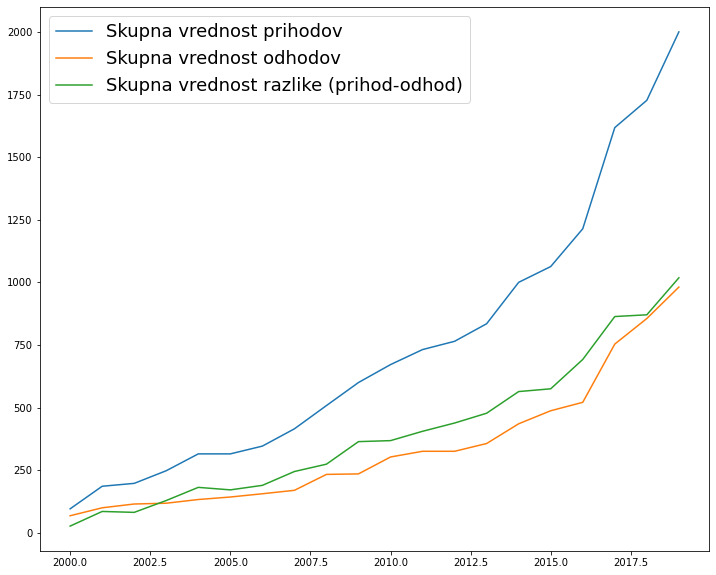

In [121]:
import numpy as np

skupna_prihodi = prihod.groupby('Leto').sum().cumsum()
skupna_odhodi = odhod.groupby('Leto').sum().cumsum()
skupna = (prihod.groupby('Leto').sum()-odhod.groupby('Leto').sum()).cumsum()

pypt.figure(figsize=(12,10))
pypt.plot(range(2000,2020),skupna_prihodi,label="Skupna vrednost prihodov")
pypt.plot(range(2000,2020),skupna_odhodi,label="Skupna vrednost odhodov")
pypt.plot(range(2000,2020),skupna,label="Skupna vrednost razlike (prihod-odhod)")
pypt.legend(loc=2, prop={'size': 18})
pypt.show()

In [122]:
#Letna potrošnja v transferjih

Cene = -prihod.groupby('Leto').sum() + odhod.groupby('Leto').sum()

skupno = pd.DataFrame([(Cene.sum())['Cena']], columns=list(['Cena']))
Cene = Cene.append(skupno)
Cene.rename({0: 'Skupno'}, axis='index')

,Cena
2000,-27.60
2001,-58.40
2002,3.65
2003,-47.35
2004,-52.45
2005,10.00
2006,-18.00
2007,-55.30
2008,-29.25
2009,-90.00


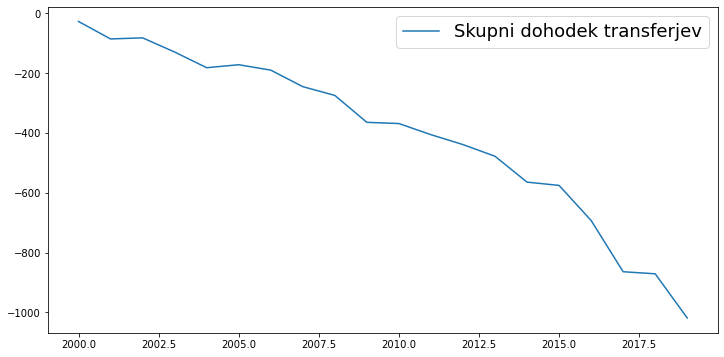

In [123]:
Cene = -prihod.groupby('Leto').sum() + odhod.groupby('Leto').sum()
pypt.figure(figsize=(12,6))
pypt.plot(range(2000,2020),Cene.cumsum(),label="Skupni dohodek transferjev")
pypt.legend(loc=1, prop={'size': 18})
pypt.show()

In [124]:
#sedaj poglejmo kolikšna je povprečna cena/razlika prestopa glede na državo

stolpci = ['Ime', 'Državljanstvo', 'Pozicija', 'Klub', 'Cena', 'Leto']
prihod1 = pd.DataFrame(columns=stolpci)

for i in range (2000,2020):
    transferIN = pd.read_csv(str(path+str(i)+'IN.csv'))
    prihod1=prihod.append(transferIN)
    
prihod1 = prihod.reset_index(drop=True)

prihod1['Cena'] = -prihod1['Cena']
vsi = odhod.append(prihod1)


vsi.groupby('Državljanstvo').mean().round(2).sort_values('Cena',ascending=False)

,Cena
Državljanstvo,
Russia,40.00
England,22.11
Ivory Coast,9.75
Chile,6.12
Germany,2.28
Venezuela,1.88
Mexico,1.45
Italy,0.60
Finland,0.00


In [125]:
#sedaj poglejmo kolikšna je povprečna cena transferja glede na državo (so brazilci najdražji?)
vsi = prihod.append(odhod)
avg_drzavljanstvo = vsi.groupby('Državljanstvo').mean()

št_prestopov = vsi.groupby('Državljanstvo').size()
št_prestopov.sort_values()

avg_drzavljanstvo[št_prestopov>=5].sort_values('Cena',ascending=False).round(2)

,Cena
Državljanstvo,
Portugal,26.28
Brazil,18.45
France,15.70
Sweden,13.00
Netherlands,8.13
Spain,7.14
Germany,7.08
Italy,6.20
Argentina,5.95


In [126]:
vsi = prihod.append(odhod)

avg_drzavljanstvo[št_prestopov>=10].sort_values('Cena',ascending=False).round(2)

,Cena
Državljanstvo,
Brazil,18.45
France,15.70
Netherlands,8.13
Spain,7.14
Argentina,5.95


In [127]:
vsi = prihod.append(odhod)
x = vsi.groupby('Državljanstvo').sum()
x=x[x>50].sort_values('Cena',ascending=False).dropna()
x

,Cena
Državljanstvo,
Brazil,719.40
Spain,685.40
France,361.00
Portugal,210.25
Netherlands,154.50
Argentina,101.10
Uruguay,100.75
Chile,100.50
England,88.45


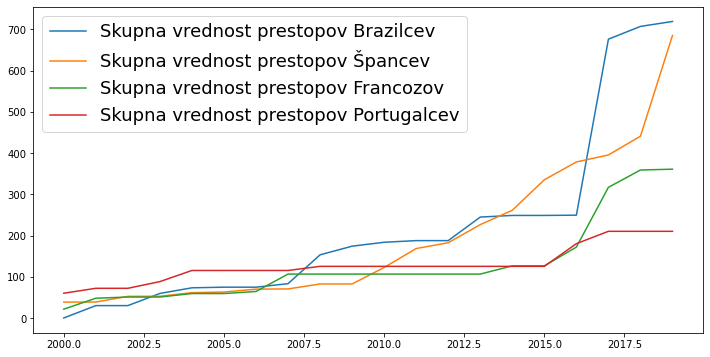

In [128]:
#skupna vrednost prestopov top 4 države

vsi = prihod.append(odhod)
bra = vsi[vsi.Državljanstvo=='Brazil']
bra=bra.groupby('Leto').sum()

spa = vsi[vsi.Državljanstvo=='Spain']
spa=spa.groupby('Leto').sum()

fra = vsi[vsi.Državljanstvo=='France']
fra=fra.groupby('Leto').sum()

por = vsi[vsi.Državljanstvo=='Portugal']
por=por.groupby('Leto').sum()

df = pd.DataFrame({'Leto': range(2000,2020),'Cena': [0] * 20})
df=df.set_index('Leto')

bra = (df+bra).fillna(0)
spa = (df+spa).fillna(0)
fra = (df+fra).fillna(0)
por = (df+por).fillna(0)

pypt.figure(figsize=(12,6))
pypt.plot(range(2000,2020),bra.cumsum(),label="Skupna vrednost prestopov Brazilcev")
pypt.plot(range(2000,2020),spa.cumsum(),label="Skupna vrednost prestopov Špancev")
pypt.plot(range(2000,2020),fra.cumsum(),label="Skupna vrednost prestopov Francozov")
pypt.plot(range(2000,2020),por.cumsum(),label="Skupna vrednost prestopov Portugalcev")
pypt.legend(loc=2, prop={'size': 18})
pypt.show()

In [129]:
#katere pozicije FCB največ kupi in proda

poz_in = prihod.groupby('Pozicija').size()

mf = poz_in.loc[['CM','DM','MF']].sum()
poz_in.loc['MF'] = mf
poz_in = poz_in.drop(['CM','DM'])

df = poz_in.loc[['LB','RB','DF']].sum()
poz_in.loc['DF'] = df
poz_in = poz_in.drop(['LB','RB'])

fw = poz_in.loc[['FW','LW']].sum()
poz_in.loc['FW'] = fw
poz_in = poz_in.drop('LW')

s = pd.Series([poz_in.sum()], index=['Skupno'])
poz_in = poz_in.append(s).sort_values().to_frame()

poz_in.rename(columns={0: "Število prihodov"})

,Število prihodov
GK,14
FW,32
MF,35
DF,38
Skupno,119


In [130]:
poz_out = odhod.groupby('Pozicija').size()

mf = poz_out.loc[['CM','DM','MF','AM']].sum()
poz_out.loc['MF'] = mf
poz_out = poz_out.drop(['CM','DM', 'AM'])

df = poz_out.loc[['LB','RB','DF','LWB','CB']].sum()
poz_out.loc['DF'] = df
poz_out = poz_out.drop(['LB','RB','LWB','CB'])

s = pd.Series([poz_out.sum()], index=['Skupno'])
poz_out = poz_out.append(s).sort_values().to_frame()

poz_out.rename(columns={0: "Število odhodov"})

,Število odhodov
GK,14
MF,41
FW,43
DF,47
Skupno,145


In [131]:
#s katerimi pozicijami največ trguje (zavržem večkratne (po imenu))

vsi = prihod.append(odhod)
poz_vsi = vsi.drop_duplicates(subset='Ime')
poz_vsi = poz_vsi.groupby('Pozicija').size()

mf = poz_vsi.loc[['CM','DM','MF','AM']].sum() #LWB manjka (igralec pride in odide, vmes se lahko pozicija zamenja)
poz_vsi.loc['MF'] = mf
poz_vsi = poz_vsi.drop(['CM','DM', 'AM'])

df = poz_vsi.loc[['LB','RB','DF','CB']].sum()
poz_vsi.loc['DF'] = df
poz_vsi = poz_vsi.drop(['LB','RB','CB'])

s = pd.Series([poz_vsi.sum()], index=['Skupno'])
poz_vsi = poz_vsi.append(s).sort_values().to_frame()

poz_vsi.rename(columns={0: "Število vseh prestopov"})

,Število vseh prestopov
GK,20
FW,44
MF,60
DF,66
Skupno,190


In [132]:
vsi = prihod.append(odhod)
vsi = vsi.groupby('Leto').size()
s = pd.Series([vsi.sum()], index=['Skupno'])
vsi = vsi.append(s).to_frame()
vsi = vsi.rename(columns={0: "Število prestopov"})
vsi

,Število prestopov
2000,13
2001,14
2002,13
2003,23
2004,19
2005,10
2006,13
2007,14
2008,18
2009,10


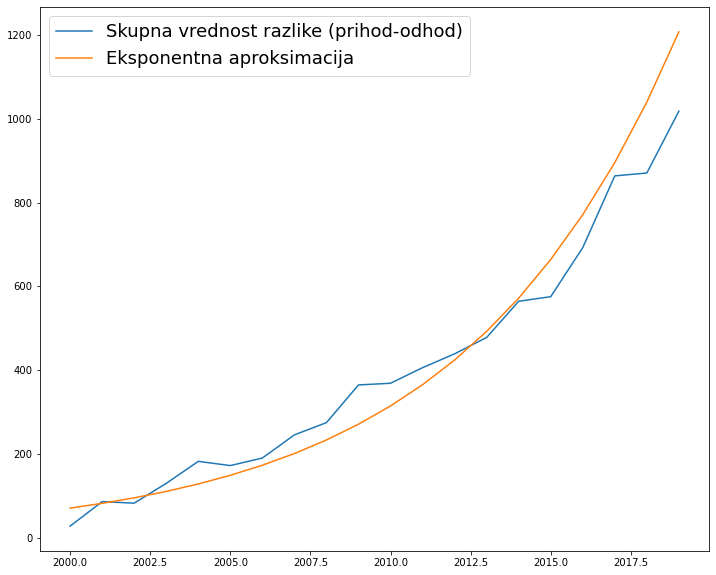

In [154]:
import numpy as np #v prvem poskusu vedno divergenca? Zato na koncu.

x = range(0,20)
y = skupna
#exp fit, lahko logaritmiramo (pozitivna, zvezna) in dobimo polinom log(y)=a+b*x
deg = 1
fit = np.polyfit(x,np.log(y),1,full=True)
VKR = (fit[1])[0]
fit = fit[0]
x1 = [np.exp(i*fit[0]) for i in x]
x0 = [np.exp(fit[1])]*len(x)
fit_exp = [x1[i]*x0[i] for i in range(len(x))]

pypt.figure(figsize=(12,10))
pypt.plot(range(2000,2020),skupna,label="Skupna vrednost razlike (prihod-odhod)")
pypt.plot(range(2000,2020),fit_exp,label='Eksponentna aproksimacija')
pypt.legend(loc=2, prop={'size': 18})
pypt.show()

#izpis vrednosti
#print('e^(a+bx); a,b,VKR = '+str(round((fit[1])[0],2))+', '+str(round((fit[0])[0],2))+', '+str(round(VKR,2))) #vsota kvadratov residualov 